In [18]:
from tqdm import tqdm
import primes_list
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import os

In [19]:
class Draw_Complex:
    def generate_5_complex(self , value_1, value_2, value_3, value_4, value_5, t_range, t_spread, 
                           color_1, color_2, color_3, color_4, color_5, size_1, size_2, size_3, size_4, size_5, 
                           alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, offset_1, offset_2, offset_3, offset_4, offset_5, 
                           enable_1, enable_2, enable_3, enable_4, enable_5, save_img = 0):
        self.hot_ls=[]
        for i in range(12):
            self.hot_ls+=[[]]
        (eq_0_r, eq_1_r, eq_2_r, eq_3_r, eq_4_r, eq_5_r, 
            eq_0_i, eq_1_i, eq_2_i, eq_3_i, eq_4_i, eq_5_i) = self.hot_ls
        for i in range(t_range):
            eq_r1, eq_r2, eq_r3, eq_r4, eq_r5 = ((np.real(np.e**(1j*2*np.pi*(i/t_spread)*value_1))*enable_1),
                                                 (np.real(np.e**(1j*2*np.pi*(i/t_spread)*value_2))*enable_2),
                                                 (np.real(np.e**(1j*2*np.pi*(i/t_spread)*value_3))*enable_3),
                                                 (np.real(np.e**(1j*2*np.pi*(i/t_spread)*value_4))*enable_4),
                                                 (np.real(np.e**(1j*2*np.pi*(i/t_spread)*value_5))*enable_5))
            eq_0_r += [eq_r1+eq_r2+eq_r3+eq_r4+eq_r5]
            eq_i1, eq_i2, eq_i3, eq_i4, eq_i5 = ((np.imag(np.e**(1j*2*np.pi*(i/t_spread)*value_1))*enable_1),
                                                 (np.imag(np.e**(1j*2*np.pi*(i/t_spread)*value_2))*enable_2),
                                                 (np.imag(np.e**(1j*2*np.pi*(i/t_spread)*value_3))*enable_3),
                                                 (np.imag(np.e**(1j*2*np.pi*(i/t_spread)*value_4))*enable_4),
                                                 (np.imag(np.e**(1j*2*np.pi*(i/t_spread)*value_5))*enable_5))
            eq_0_i += [eq_i1+eq_i2+eq_i3+eq_i4+eq_i5]
        for i in range(int((len(eq_0_i)+len(eq_0_r))/2)):
            eq_1_r += [(eq_0_r[i])/(offset_1)]
            eq_1_i += [(eq_0_i[i])/(offset_1)]
            eq_2_r += [(eq_0_r[i])/(offset_2)]
            eq_2_i += [(eq_0_i[i])/(offset_2)]
            eq_3_r += [(eq_0_r[i])/(offset_3)]
            eq_3_i += [(eq_0_i[i])/(offset_3)]
            eq_4_r += [(eq_0_r[i])/(offset_4)]
            eq_4_i += [(eq_0_i[i])/(offset_4)]
            eq_5_r += [(eq_0_r[i])/(offset_5)]
            eq_5_i += [(eq_0_i[i])/(offset_5)]
        plt.scatter(eq_1_r,eq_1_i,s=size_1,alpha=alpha_1,c=color_1)
        plt.scatter(eq_2_r,eq_2_i,s=size_2,alpha=alpha_2,c=color_2)
        plt.scatter(eq_3_r,eq_3_i,s=size_3,alpha=alpha_3,c=color_3)
        plt.scatter(eq_4_r,eq_4_i,s=size_4,alpha=alpha_4,c=color_4)
        plt.scatter(eq_5_r,eq_5_i,s=size_5,alpha=alpha_5,c=color_5)
        plt.xticks([])
        plt.yticks([])
        if save_img == True:
            len_img_ls = self.ls_directory()
            len_var = len(len_img_ls)
            plt.savefig('plotimg/img{}graph.jpg'.format(str(len_var)), dpi=320)
        plt.show()
        plt.close()

In [20]:
class d_f_T:
    def dft_calc(self, input_array):
        self.dft_dict = {}
        self.dft_dict['frequency_var'] = []
        self.dft_dict['amplitude_var'] = []
        self.dft_dict['phase_var'] = []
        self.dft_dict['coord_var'] = []
        self.x_real = 0
        self.y_imag = 0
        self.range_var = len(input_array)
        for k in range(self.range_var):  # tqdm(
            for n in range(self.range_var):
                angle_var = (((2*np.pi)*k*n)/self.range_var)
                self.x_real += ((input_array[n])* np.cos(angle_var))
                self.y_imag += (-(input_array[n])* np.sin(angle_var))
            self.x_real = self.x_real / self.range_var
            self.y_imag = self.y_imag / self.range_var
            self.dft_dict['frequency_var'] += [k]
            self.dft_dict['amplitude_var'] += [((self.x_real**2)+(self.y_imag**2))**(1/2)]
            self.dft_dict['phase_var'] += [np.arctan2(self.y_imag, self.x_real)]
            self.dft_dict['coord_var'] += [(self.x_real,self.y_imag)]
        return(self.dft_dict)
    def plot_phase_amp(self, s_list, s_show=True):
        a_ls,b_ls,c_ls,d_ls,e_ls=[],[],[],[],[]
        for i in s_list:
            a_ls += [int(i[0])]
            b_ls += [int(i[1])]
            c_ls += [int(i[2])]
            d_ls += [int(i[3])]
            e_ls += [int(i[4])]
        a_ls_ft = self.dft_calc(a_ls)
        b_ls_ft = self.dft_calc(b_ls)
        c_ls_ft = self.dft_calc(c_ls)
        d_ls_ft = self.dft_calc(d_ls)
        e_ls_ft = self.dft_calc(e_ls)
        self.result_tpl=((round(sum(e_ls_ft['amplitude_var'][1::])/len(e_ls_ft['frequency_var'][1::]),2),
                    round(sum(e_ls)/len(e_ls),2)),
                    (round(sum(b_ls_ft['amplitude_var'][1::])/len(b_ls_ft['frequency_var'][1::]),2),
                    round(sum(b_ls)/len(b_ls),2)),
                    (round(sum(c_ls_ft['amplitude_var'][1::])/len(c_ls_ft['frequency_var'][1::]),2),
                    round(sum(c_ls)/len(c_ls),2)),
                    (round(sum(d_ls_ft['amplitude_var'][1::])/len(d_ls_ft['frequency_var'][1::]),2),
                    round(sum(d_ls)/len(d_ls),2)),
                    (round(sum(e_ls_ft['amplitude_var'][1::])/len(e_ls_ft['frequency_var'][1::]),2),
                    round(sum(e_ls)/len(e_ls),2)))
        if s_show == 1:
            with plt.style.context('seaborn-dark'):
                plt.plot(a_ls_ft['frequency_var'][1::],a_ls_ft['amplitude_var'][1::], color='black', label='A')
                plt.plot(b_ls_ft['frequency_var'][1::],b_ls_ft['amplitude_var'][1::], color='cyan', label='B')
                plt.plot(c_ls_ft['frequency_var'][1::],c_ls_ft['amplitude_var'][1::], color='blue', label='C')
                plt.plot(d_ls_ft['frequency_var'][1::],d_ls_ft['amplitude_var'][1::], color='red', label='D')
                plt.plot(e_ls_ft['frequency_var'][1::],e_ls_ft['amplitude_var'][1::], color='yellow', label='E')        
                plt.xlabel(str(self.result_tpl), fontsize = 10)
                plt.grid()
                plt.legend(loc=9)
                plt.show()
        else:
            pass
            #plt.savefig('plotimg/imgraphguitest', dpi=120)
            #plt.close()  

In [21]:
class Handle_File(Draw_Complex, d_f_T):
    def ls_directory(self, directory='plotimg', filetype='.jpg'):
        ls_dir_raw = os.listdir(directory)
        ls_dir = []
        for i in ls_dir_raw:
            if filetype == 'any':
                ls_dir += [i]
            elif filetype in i:
                ls_dir += [i]
            else:
                pass
        return ls_dir
    def make_file(self, f_name='eqvar.txt', f_content=''):
        save_txt = open('{}'.format(f_name), 'w')
        save_txt.write(f_content)
        save_txt.close()
    def open_file(self, f_name='eqvar.txt'):
        raw_txt = open('{}'.format(f_name), 'r')
        str_read = raw_txt.read()
        raw_txt.close()
        return str_read
    def read_list_txt(self, f_name='eqvar.txt'):
        txt_ls = self.open_file(f_name).split('\n')[1::]
        new_ls = []
        for i in txt_ls:
            try:
                hot_var = eval(i)
                if hot_var not in new_ls:
                    new_ls += [hot_var]
            except:
                pass
        return new_ls
    def append_file(self, append_str, f_name='eqvar.txt'):
        str_read = self.open_file(f_name)
        str_read = str_read + '\n' + append_str
        save_txt = open('{}'.format(f_name), 'w')
        save_txt.write(str_read)
        save_txt.close()
    def append_list(self, append_ls, f_name='eqvar.txt'):
        ls_read = self.read_list_txt(f_name)
        for i in append_ls:
            if i not in ls_read:
                ls_read += [i]
        self.make_file(f_name)
        for i in ls_read:
            self.append_file(str(i), f_name)
    def append_entry(self, a1_int, b2_int, c3_int, d4_int, e5_int, f_name='eqvar.txt'):
        if type(a1_int) == str:
            entry_var = [int(a1_int),int(b2_int),int(c3_int),int(d4_int),int(e5_int)]
        elif type(a1_int) == int:
            entry_var = [a1_int, b2_int, c3_int, d4_int, e5_int]
        txt_ls = [entry_var]
        self.append_list(txt_ls, f_name)
    def draw_entry(self, a1_int, b2_int, c3_int, d4_int, e5_int):
        value_1 = pot[int(a1_int)]
        value_2 = pot[int(b2_int)]
        value_3 = pot[int(c3_int)]
        value_4 = pot[int(d4_int)]
        value_5 = pot[int(e5_int)]
        self.generate_5_complex(value_1, value_2, value_3, value_4, value_5)
    def draw_list(self, s_list, save_val=0):
        for i in s_list:
            value_1 = pot[int(i[0])]
            value_2 = pot[int(i[1])]
            value_3 = pot[int(i[2])]
            value_4 = pot[int(i[3])]
            value_5 = pot[int(i[4])]
            #choices_ls= ['fuchsia']+['aqua']+['blue']+['lime']+['gold']
            pick_color_1= 'navy'#rd.choices(choices_ls)
            #choices_ls.remove(pick_color_1[0])
            pick_color_2= 'red'#rd.choices(choices_ls)
            #choices_ls.remove(pick_color_2[0])
            pick_color_3= 'indigo'#rd.choices(choices_ls)
            #choices_ls.remove(pick_color_3[0])
            pick_color_4= 'yellow'#rd.choices(choices_ls)
            #choices_ls.remove(pick_color_4[0])
            pick_color_5= 'lime'#rd.choices(choices_ls)
            #choices_ls.remove(pick_color_5[0])
            self.t_range=2000 
            self.t_spread=1000
            self.color_1=pick_color_1
            self.color_2=pick_color_2 
            self.color_3=pick_color_3 
            self.color_4=pick_color_4
            self.color_5=pick_color_5 
            self.size_1=25
            self.size_2=20
            self.size_3=15
            self.size_4=10 
            self.size_5=5
            self.alpha_1=.30
            self.alpha_2=.25
            self.alpha_3=.20
            self.alpha_4=.15
            self.alpha_5=.1
            self.offset_1=.45#1.45
            self.offset_2=.49#1.49
            self.offset_3=.5#1.505
            self.offset_4=.53#1.535
            self.offset_5=.57#1.57
            self.enable_1=1.5
            self.enable_2=1.1
            self.enable_3=1
            self.enable_4=0.1
            self.enable_5=0.5
            self.generate_5_complex(value_1, value_2, value_3, value_4, value_5, self.t_range, self.t_spread, 
                           self.color_1, self.color_2, self.color_3, self.color_4, self.color_5, 
                           self.size_1, self.size_2, self.size_3, self.size_4, self.size_5, self.alpha_1, 
                           self.alpha_2, self.alpha_3, self.alpha_4, self.alpha_5, self.offset_1, 
                           self.offset_2, self.offset_3, self.offset_4, self.offset_5, 
                           self.enable_1, self.enable_2, self.enable_3, self.enable_4, self.enable_5,
                                   save_val)
            text_var = ( pot[int(i[0])], pot[int(i[1])], pot[int(i[2])], pot[int(i[3])], pot[int(i[4])], 
                           self.t_range, self.t_spread,
                           self.color_1, self.color_2, self.color_3, self.color_4, self.color_5, 
                           self.size_1, self.size_2, self.size_3, self.size_4, self.size_5, 
                           self.alpha_1, self.alpha_2, self.alpha_3, self.alpha_4, self.alpha_5, 
                           self.offset_1, self.offset_2, self.offset_3, self.offset_4, self.offset_5,  
                           self.enable_1, self.enable_2, self.enable_3, self.enable_4, self.enable_5)  
            print(text_var)
            if save_val == True:
                len_txt_ls = self.ls_directory('plotimg', '.txt')
                len_var = len(len_txt_ls)
                self.make_file('plotimg/img{}txt.txt'.format(str(len_var)), '{}'.format(eval(str(text_var))))
    def get_sample_ls(self, sample_length):
        sample_ls=[]
        sample_dft_ls=[]
        for i in range(sample_length):#  .0,
            a_var = pot[int(((rd.randrange(1,10))*1/1*np.pi-(i/rd.randrange(1,10)))/rd.randrange(1,10)+(i/1))]
            b_var = pot[int(((rd.randrange(1,10))*1/1*np.pi-(i/rd.randrange(1,10)))/rd.randrange(1,10)+(i/1))]
            c_var = pot[int(((rd.randrange(1,10))*1/1*np.pi-(i/rd.randrange(1,10)))/rd.randrange(1,10)+(i/1))]
            d_var = pot[int(((rd.randrange(1,10))*1/1*np.pi-(i/rd.randrange(1,10)))/rd.randrange(1,10)+(i/1))]
            e_var = pot[int(((rd.randrange(1,10))*1/1*np.pi-(i/rd.randrange(1,10)))/rd.randrange(1,10)+(i/1))]
            if a_var != e_var and b_var != d_var:
                sample_ls+=[[pot.index(a_var),pot.index(b_var),pot.index(c_var),pot.index(d_var),pot.index(e_var)]]
                sample_dft_ls+=[[a_var,b_var,c_var,d_var,e_var]]
            else:
                pass
        return (sample_ls, sample_dft_ls)

In [22]:
def get_analytics(f_m):
    twisted_ls = []
    hv_x = f_m.get_sample_ls(50)
    h_a = hv_x[0]
    h_b = hv_x[1]
    avg_ls_plot = []
    for t in range(3):
        try:
            for i in range(len(h_a)):
                for f in range(len(h_a[i])):
                    if h_a[i].count(h_a[i][f]) > 1:
                        h_a.remove(h_a[i])
        except:
            pass
    f_m.plot_phase_amp(h_a, 0)
    for i in f_m.result_tpl:
        dft_avg = round((i[0] + i[1])/2, 2)
        avg_ls_plot += [[i[0], dft_avg, i[1]]]
    plt_a = avg_ls_plot
    plt_arr = np.array(plt_a)
    twisted_ls+= np.transpose(plt_arr).tolist()
    avg_ls_plot = []
    for t in range(3):
        try:
            for i in range(len(h_b)):
                for f in range(len(h_b[i])):
                    if h_b[i].count(h_b[i][f]) > 1:
                        h_b.remove(h_b[i])
        except:
            pass
    f_m.plot_phase_amp(h_b, 0)
    for i in f_m.result_tpl:
        dft_avg = round((i[0] + i[1])/2, 2)
        avg_ls_plot += [[i[0], dft_avg, i[1]]]
    plt_b = avg_ls_plot
    plt_arr = np.array(plt_b)
    twisted_ls+= np.transpose(plt_arr).tolist()
    h_ba = h_b+h_a
    avg_ls_plot = []
    for t in range(3):
        try:
            for i in range(len(h_ba)):
                for f in range(len(h_ba[i])):
                    if h_ba[i].count(h_ba[i][f]) > 1 and h_ba[i][f] <= 25997:
                        h_ba.remove(h_ba[i])
        except:
            pass
    f_m.plot_phase_amp(h_ba)
    for i in f_m.result_tpl:
        dft_avg = round((i[0] + i[1])/2, 2)
        avg_ls_plot += [[i[0], dft_avg, i[1]]]
    plt_ba = avg_ls_plot
    plt_arr = np.array(plt_ba)
    twisted_ls+= np.transpose(plt_arr).tolist()
    for i in range(len(twisted_ls)):
        for f in range(len(twisted_ls[i])):
            twisted_ls[i][f] = int(twisted_ls[i][f]*10)+rd.randrange(int(min(min(twisted_ls))/9),int((max(max(twisted_ls)))/18))
    for t in range(3):
        try:
            for i in range(len(twisted_ls)):
                for f in range(len(twisted_ls[i])):
                    if twisted_ls[i].count(twisted_ls[i][f]) > 1 and twisted_ls[i][f] <= 25997:
                        twisted_ls.remove(twisted_ls[i])
        except:
            pass
    f_m.plot_phase_amp(twisted_ls)
    return (h_ba, twisted_ls)


In [23]:
pot = primes_list.primesofthousands
f_m = Handle_File()
def get_result(iter_8):
    for i in range(iter_8):
        try:
            result_ls = get_analytics(f_m)
            print(len(result_ls[0]))
            if len(result_ls[0]) >= 10:
                return result_ls
        except:
            pass

def clear_dir():
    dir_ls = os.listdir('plotimg')
    for i in dir_ls:
        if '.txt' in i:
            os.remove('plotimg/{}'.format(i))
        if '.jpg' in i:
            os.remove('plotimg/{}'.format(i))
        if '.png' in i:
            os.remove('plotimg/{}'.format(i))
    dir_ls = os.listdir('plotimg')
    print(dir_ls)

In [24]:
clear_dir()

['.ipynb_checkpoints', '1', 'Ny mappeplotimg']


In [8]:
#result_ls = get_result(10)
#result_ls

In [9]:
#f_m.draw_list(result_ls[0], 0)
print('#########################')
print('#########################')
print('#### # T W I S T # ######')
print('#########################')
print('#########################')
#f_m.draw_list(result_ls[1], 0)

#########################
#########################
#### # T W I S T # ######
#########################
#########################


In [26]:
#eq_var =  result_ls[1]+result_ls[0]
#f_m.draw_list(eq_var)

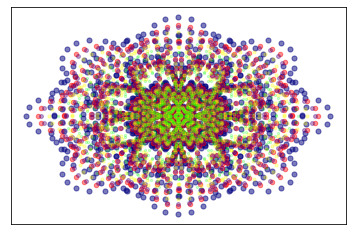

(131, 103, 107, 167, 127, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


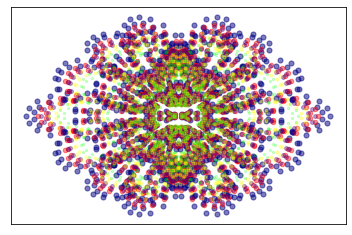

(491, 181, 233, 379, 457, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


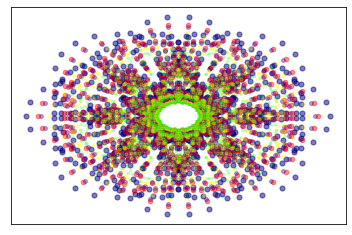

(373, 367, 359, 397, 379, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


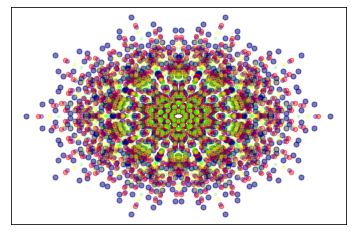

(487, 197, 277, 397, 467, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


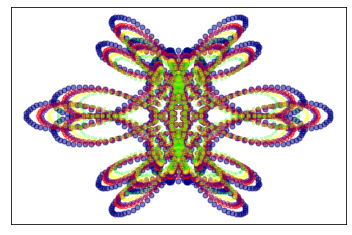

(491, 503, 521, 509, 499, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


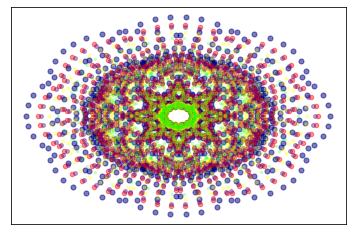

(113, 101, 107, 173, 137, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


In [25]:
eq_var=[[31, 26, 27, 38, 30],
        [93, 41, 50, 74, 87],
        [73, 72, 71, 77, 74],
        [92, 44, 58, 77, 90],
        [93, 95, 97, 96, 94],
        [29, 25, 27, 39, 32]]
f_m.draw_list(eq_var)

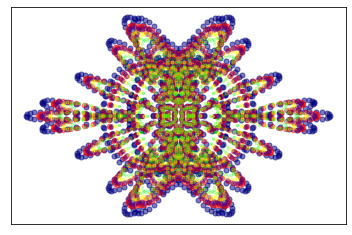

(1523, 1489, 1483, 1511, 1499, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


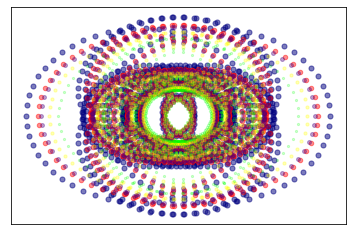

(1019, 1009, 1021, 1013, 997, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


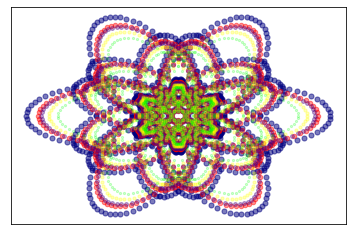

(2017, 2011, 1987, 1999, 1993, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


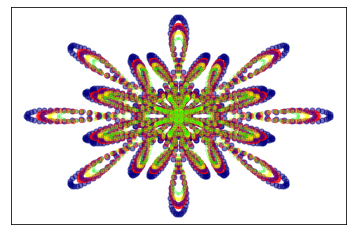

(2011, 2003, 1979, 1997, 1987, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


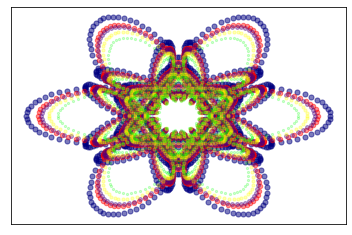

(1511, 1487, 1481, 1499, 1493, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


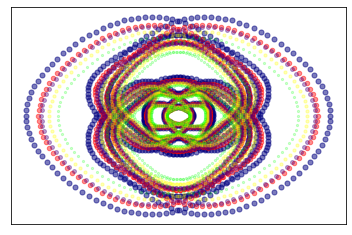

(1493, 1487, 1489, 1531, 1499, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


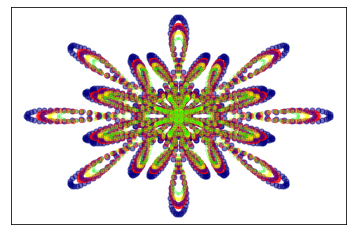

(2011, 2003, 1979, 1997, 1987, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


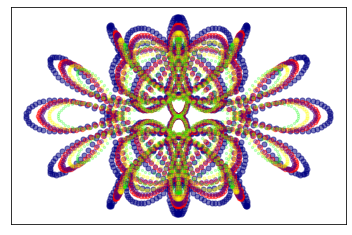

(997, 991, 1019, 1013, 1009, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


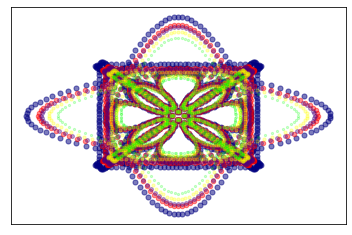

(1499, 1487, 1483, 1523, 1523, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 1.5, 1.1, 1, 0.1, 0.5)


In [30]:
eq_var=[[240, 236, 234, 239, 238],
        [170, 168, 171, 169, 167],
        [305, 304, 299, 302, 300],
        [304, 303, 298, 301, 299],
        [239, 235, 233, 238, 237],
        [237, 235, 236, 241, 238],
        [304, 303, 298, 301, 299],
        [167, 166, 170, 169, 168],
        [238, 235, 234, 240, 240]]
f_m.draw_list(eq_var)

In [14]:

eq_var=[[8,2,4,18,1],
    [11,10,18,17,17],
    [14,11,18,14,11],
    [14,12,15,15,16],
    [14,16,22,16,15],
    [17,16,16,15,17],
    [17,20,26,17,18],
    [18,13,20,18,17],
    [18,13,22,16,18],
    [18,21,16,17,19],
    [18,31,17,19,18],
    [19,14,27,16,22],
    [19,18,18,21,20],
    [19,30,17,32,17],
    [20,12,13,22,15],
    [20,17,17,24,18],
    [20,33,17,32,20],
    [21,17,17,28,18],
    [21,18,19,18,20],
    [24,21,21,35,24],
    [24,24,21,30,24],
    [24,27,26,23,25],
    [25,25,23,22,29],
    [26,13,22,22,22],
    [28,23,34,25,28],
    [29,22,38,27,31],
    [31,13,37,42,26],
    [31,26,27,38,30],
    [43,43,75,78,56],
    [44,29,51,44,46],
    [59,75,59,91,59],
    [73,72,71,77,74],
    [81,43,50,50,78],
    [89,37,47,43,60],
    [91,95,84,94,93],
    [92,44,58,77,90],
    [93,41,50,74,87],
    [98,55,55,83,98],
    [113,109,110,111,114],
    [168,167,171,170,169],
    [237,235,236,241,238],
    [239,235,233,238,237],
    [305,304,299,302,300],
    [333,332,336,335,334],
    [353,350,354,352,351],
    [370,380,395,333,360],
    [457,460,456,459,458]]
#f_m.draw_list(eq_var)

In [90]:
#f_m.draw_list([[1, 2, 2, 2, 1]])

In [89]:
#f_m.draw_list([[304, 303, 298, 301, 299]])

In [87]:
#for i in range(10):
#    f_m.generate_5_complex(2017, 2011, 1987, 1999, 1993, 2000, 1000, ['yellow'], ['indigo'], ['turquoise'], ['blue'], ['purple'], 30, 20, 15, 10, 5, 0.25, 0.25, 0.25, 0.25, 0.25, 1.45, 1.49, 1.505, 1.535, 1.57, 109751, 139891, 65063, 30059*(i+9), 209311/(i+9))

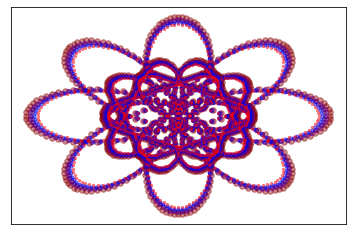

In [26]:
f_m.generate_5_complex(pot[304], pot[303], pot[298], pot[301], pot[299], 2000, 1000, ['darkred'], ['purple'], ['indigo'], ['blue'], ['red'], 30, 20, 15, 10, 5, 0.25, 0.25, 0.25, 0.25, 0.25, 1.45, 1.49, 1.505, 1.535, 1.57, 109751, 139891, 65063, 30059, 209311)

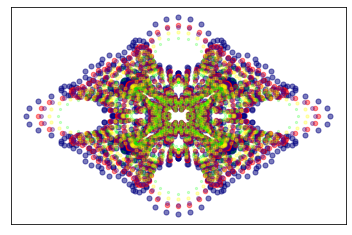

In [27]:
f_m.generate_5_complex(199, 251, 191, 227, 263, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 109751, 139891, 65063, 30059, 209311)

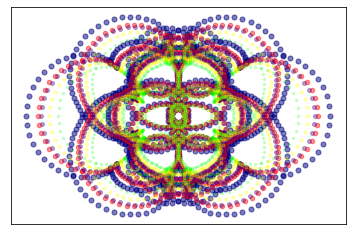

In [28]:
f_m.generate_5_complex(5, 13, 31, 43, 3, 2000, 1000, 'navy', 'red', 'indigo', 'yellow', 'lime', 25, 20, 15, 10, 5, 0.3, 0.25, 0.2, 0.15, 0.1, 0.45, 0.49, 0.5, 0.53, 0.57, 109751, 139891, 65063, 30059, 209311)

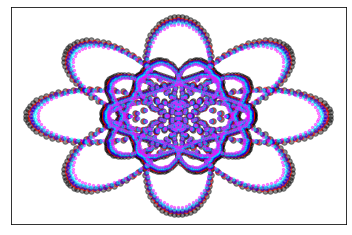

In [29]:
f_m.generate_5_complex(2011, 2003, 1979, 1997, 1987, 2000, 1000, ['black'], ['red'], ['blue'], ['cyan'], ['magenta'], 30, 20, 15, 10, 5, 0.25, 0.25, 0.25, 0.25, 0.25, 1.45, 1.49, 1.505, 1.535, 1.57, 109751, 139891, 65063, 30059, 209311)